<a href="https://colab.research.google.com/github/kaybrian/Tensorflow_self_study/blob/main/simple_fashion_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:

data = keras.datasets.fashion_mnist


In [3]:
data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [4]:

(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [23]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

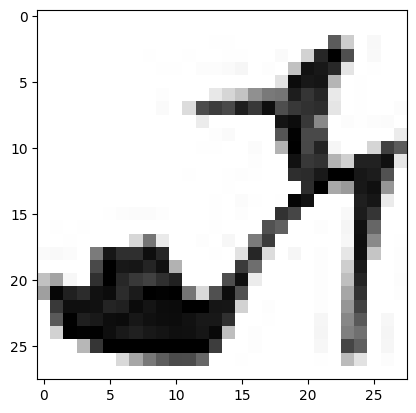

In [28]:
plt.imshow(train_images[9], cmap=plt.cm.binary)
plt.show()

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2846 - accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.8994
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2599 - accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2502 - accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2404 - accuracy: 0.9099
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2321 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2246 - accuracy: 0.9156
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2179 - accuracy: 0.9179
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2108 - accuracy: 0.9207
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.205

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8870


In [40]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [42]:
predictions[0]

array([4.4551878e-09, 7.6763303e-14, 9.6530402e-11, 1.8445705e-13,
       1.7607291e-13, 1.1624338e-03, 5.6223193e-10, 5.1281718e-04,
       2.9872229e-09, 9.9832469e-01], dtype=float32)

In [43]:
print(np.argmax(predictions[0]))

9


In [44]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

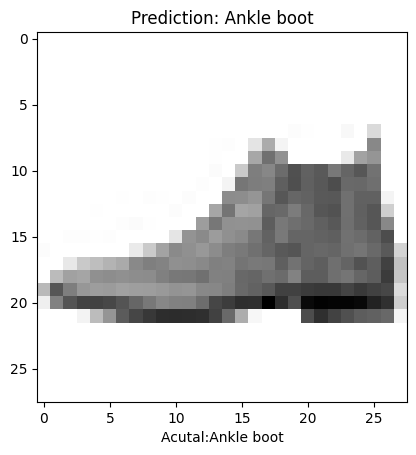

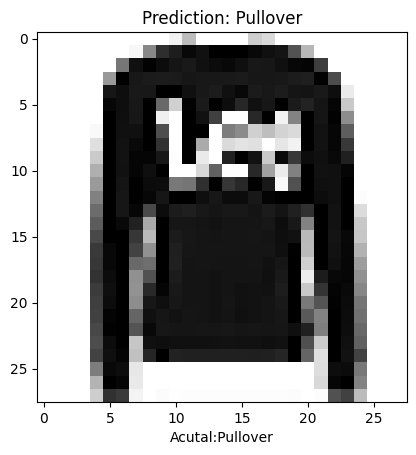

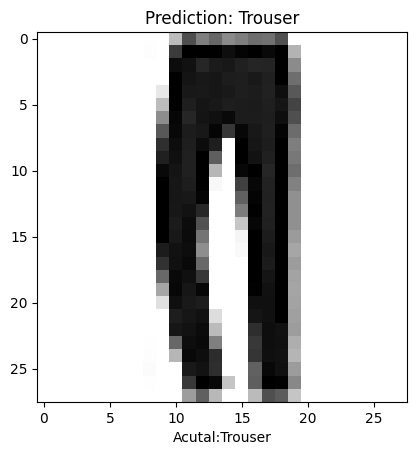

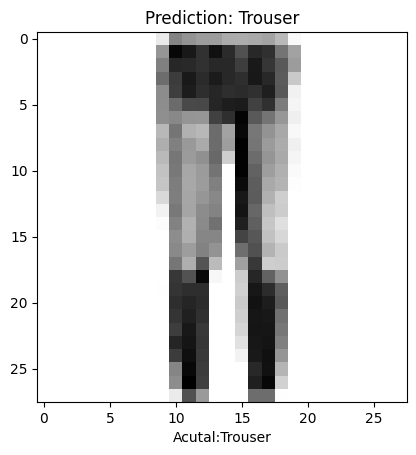

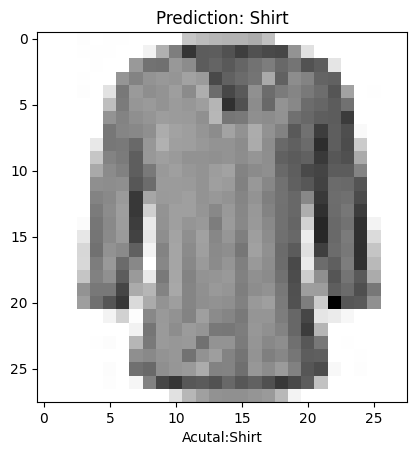

In [47]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel('Acutal:' + class_names[test_labels[i]])
  plt.title("Prediction: " + class_names[np.argmax(predictions[i])])
  plt.show()

